In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train['train_test'] = 1 # create a column that flags the train data with ones;
test['train_test'] = 0 # create a column that flags test data with zeros;
test['Survived'] = np.NaN # create a column of Survived with NaN values.

all_data = pd.concat([train, test]) # concatenate all de data

all_data.columns # see all the columns we have

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [164]:
train.info() # understanding the types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [165]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [166]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [167]:
# Separate numerical and categorical data
df_num = train[['Age', 'SibSp','Parch', 'Fare']]
df_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

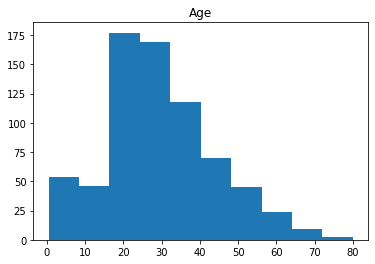

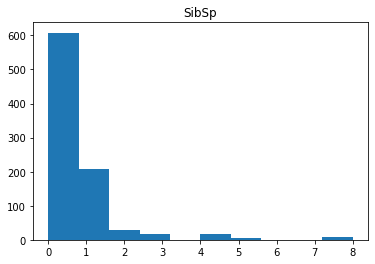

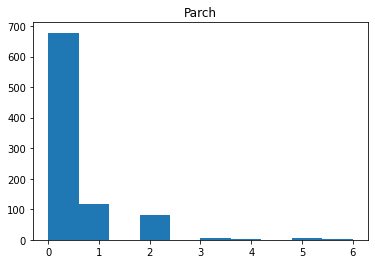

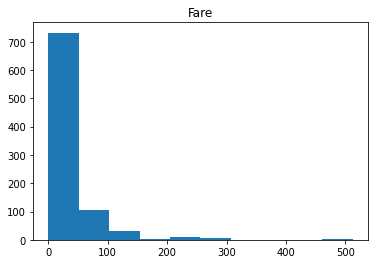

In [168]:
# Analysing the distribuitions of the numerical variables:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

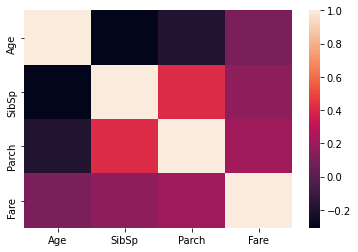

In [169]:
# Analysing some correlation
print(df_num.corr())
sns.heatmap(df_num.corr())

In [170]:
# Compare survival rate across Age, SibSp, Parch and Fare
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp','Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


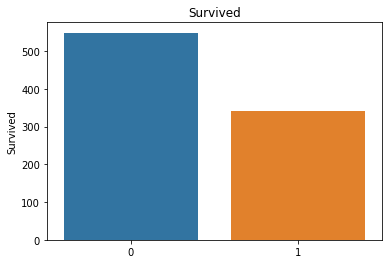

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


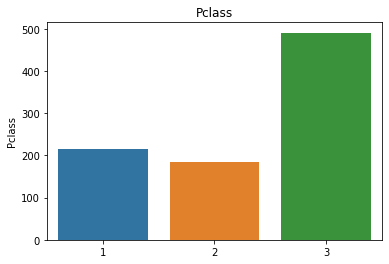

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


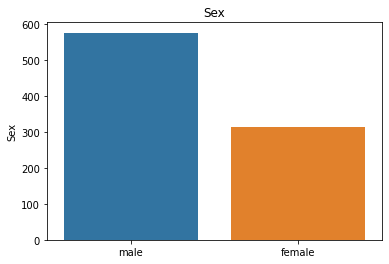

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


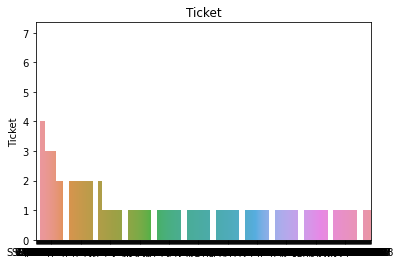

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


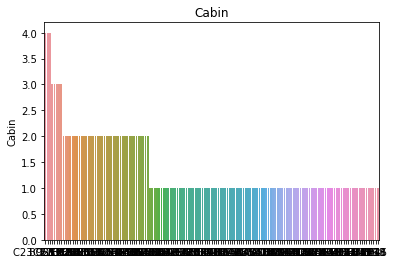

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


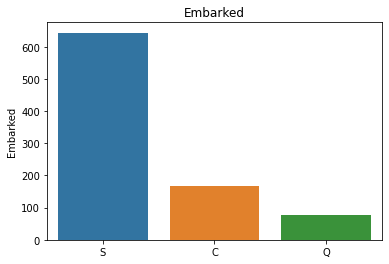

In [171]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [172]:
# Comparing Survived with each of the categorical variables

In [173]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [174]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [175]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [176]:
# filled the NaN Cabins's whit zeros and count the diferent Cabins
df_cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [177]:
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [178]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [179]:
# Create a category based on the cabin letter

train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [180]:
# Count the Cabin letters, n is for nan
train.cabin_adv.value_counts() 

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [181]:
# We can see that in some Cabin's Letters, theres a big difference whose survived or not, so this brings us that we 
# can use de letter as a categorical variable 
pd.pivot_table(train, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc = 'count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [182]:
train['numeric_tickets'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/','').lower()
                                            if len(x.split(' ')[:-1]) > 0 else 0)

In [183]:
train['numeric_tickets'].value_counts()

1    661
0    230
Name: numeric_tickets, dtype: int64

In [184]:
pd.set_option('max_rows', None) # option to show them all
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
sotono2        2
ppp            2
scah           2
swpp           2
as             1
fa             1
fc             1
sp             1
casoton        1
scow           1
sca4           1
sc             1
scahbasle      1
sop            1
Name: ticket_letters, dtype: int64

In [185]:
pd.pivot_table(train, index = 'Survived', columns = 'numeric_tickets', values = 'Ticket', aggfunc = 'count')

numeric_tickets,0,1
Survived,,
0,142,407
1,88,254


In [186]:
pd.pivot_table(train, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [187]:
train.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [188]:
# See if the title of the people influences
train['Name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [189]:
train['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
the Countess      1
Jonkheer          1
Don               1
Ms                1
Lady              1
Sir               1
Mme               1
Name: Name_title, dtype: int64

In [190]:
pd.pivot_table(train, index = 'Survived', columns = 'Name_title', values = 'Name', aggfunc = 'count')
# we concludes that the captain dead with his vessel

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [191]:
# making the changes with all the data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])

all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [192]:
# Making NaN values be continuous data
all_data.Age = all_data.Age.fillna(train.Age.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.mean())

In [207]:
all_data.Embarked.isnull().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [209]:
# Drop the 2 NaN values on the Embarked column
all_data.dropna(subset = ['Embarked'], inplace = True)

In [210]:
all_data['norm_sibsp'] = np.log(all_data.SibSp + 1)

<AxesSubplot:>

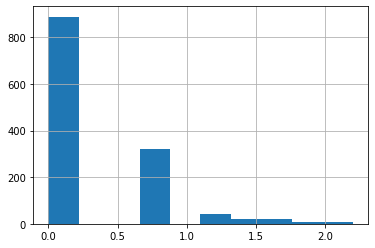

In [211]:
all_data['norm_sibsp'].hist()

<AxesSubplot:>

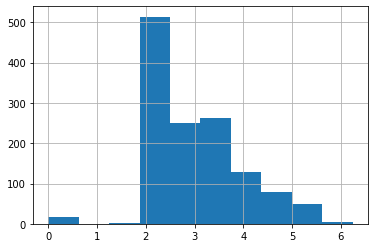

In [213]:
all_data['norm_fare'] = np.log(all_data.Fare + 1)
all_data['norm_fare'].hist()

In [219]:
# Converting data to str to use the OneHotEncode Method
all_data.Pclass = all_data.Pclass.astype(str)

In [222]:
# Create dummy variables from the categorical values

all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv',
                                      'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test']])

all_dummies.head(10)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.000000,1,0,2.110213,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.000000,1,0,4.280593,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.000000,0,0,2.188856,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,35.000000,1,0,3.990834,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.000000,0,0,2.202765,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,29.699118,0,0,2.246893,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,54.000000,0,0,3.967694,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,2.000000,3,1,3.094446,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,27.000000,0,2,2.495954,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,14.000000,1,0,3.436268,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [224]:
# Spliting in train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

In [225]:
y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

(889,)

In [227]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp', 'Parch', 'norm_fare']])
all_dummies_scaled.head(10)

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.607808,0.480272,-0.445407,-0.896856,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.636788,0.480272,-0.445407,1.347144,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.296659,-0.479537,-0.445407,-0.815546,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.403426,0.480272,-0.445407,1.047556,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.403426,-0.479537,-0.445407,-0.801165,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,-0.008915,-0.479537,-0.445407,-0.755541,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1.881383,-0.479537,-0.445407,1.023632,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,-2.163552,2.399890,0.709647,0.120762,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,-0.218872,-0.479537,1.864701,-0.498031,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,-1.230105,0.480272,-0.445407,0.474180,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [228]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived

In [232]:
# Time to try a lot of different models

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [236]:
# Using Naive Bayes as a baseline for the classification tasks (because is a very simple model)
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
 
0.7221735542436362


In [240]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
 
0.8211832666793626


In [241]:
# Trying the LogisticRegression with scaling
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
 
0.8211832666793626


In [242]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
 
0.776207706468609


In [243]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
 
0.7739541674601662


In [245]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.76966292 0.80898876 0.80337079 0.81460674 0.83615819]
 
0.8065574811147084


In [247]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
 
0.8155652891512728


In [248]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
 
0.8065638291119152


In [250]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
 
0.8054402336062972


In [251]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
 
0.8324319177299563


In [253]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

[19:47:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[19:47:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
 
0.8177743921792675


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [255]:
# This votes about the popular choices of all the models
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr), ('knn',knn), ('rf', rf), ('gnb',gnb), ('svc', svc),('xgb', xgb)], voting = 'soft')

In [256]:
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv = 5)
print(cv)
print(' ')
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[20:00:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[20:00:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[20:00:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[20:00:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[20:00:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.83146067 0.81460674 0.83146067 0.80337079 0.85875706]
 
0.8279311877102774


In [259]:
voting_clf.fit(X_train_scaled, y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission.csv', index = False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:04:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [260]:
# tuning the models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [261]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [262]:
lr = LogisticRegression()
param_grid = {'max_iter': [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver': ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = - 1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [263]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3, 5, 7, 9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
              'p': [1, 2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8301720307243065
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [265]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : [0.1, 0.5, 1, 2, 5, 10],
                                  'C': [0.1, 1, 10, 100, 1000]},
                                 {'kernel' : ['linear'], 'C' : [0.1, 1, 10, 100, 1000]},
                                 {'kernel' : ['poly'], 'degree' : [2, 3, 4, 5], 'C': [0.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = - 1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8324319177299563
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [267]:
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [100, 500, 1000],
              'bootstrap' : [True, False],
              'max_depth' : [3, 5, 10, 20, 50, 75, 100, None],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf' : [1, 2, 4,10],
              'min_samples_split' : [2, 5, 10]}

clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd  = clf_rf_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8346664127467784
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [269]:
# Now we can make the same thing but using less parameters 
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators' : [400, 450, 500, 550],
              'criterion' : ['gini', 'entropy'],
                 'bootstrap' : [True],
                 'max_depth' : [15, 20, 25],
                 'max_features' : ['auto', 'sqrt', 10],
                 'min_samples_leaf' : [2, 3],
                 'min_samples_split' : [2, 3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = - 1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


<AxesSubplot:>

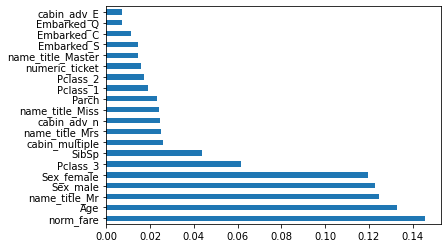

In [272]:
# the variable importances - that have more impact on the model
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index = X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind = 'barh')

In [ ]:
# Finding the best parameter for the xgb
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators' : [20, 50, 100, 250, 500, 1000],
    'colsample_bytree' : [0.2, 0.5, 0.7, 0.8,1],
    'max_depth' : [2, 5, 10, 15, 20, 25, None],
    'reg_alpha' : [0, 0.5, 1],
    'reg_lambda' : [1, 1.5, 2],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'gamma' : [0, 0.01, 0.1, 1, 10, 100],
    'min_child_weight' : [0, 0.01, 0.1, 1, 10, 100],
    'sampling_method' : ['uniform', 'gradient_based']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = - 1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB')

clf_xgb_rnd = RandomizeSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = - 1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb_rnd, 'XGB')

Fitting 5 folds for each of 4762800 candidates, totalling 23814000 fits


In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators' : [450, 500, 550],
    'colsample_bytree' : [0.75, 0.8, 0.85],
    'max_depth' : [None],
    'reg_alpha' : [1],
    'reg_lambda' : [2, 5, 10],
    'subsample' : [0.55, 0.6, 0.65],
    'learning_rate' : [0.5],
    'gamma' : [0.5, 1, 2],
    'min_child_weight' : [0.01],
    'sampling_method' : ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid, param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB')

In [ ]:
y_hat_xgb = best_clf_xgb.best_estimator.predict(X_test_scaled)
xgb_submission = {'PassengerId' : test.PassengerId, 'Survived' : y_hat_xgb}
submission_xgb.to_csv('xgb_submission3.csv', index = False)

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'hard')
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'soft')
voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting = 'soft')
voting_clf_xgb = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr), ('xgb', best_xgb)], voting = 'soft')

print('voting_clf_hard :', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5))
print('voting_clf_hard mean :', cross_val_score(voting_clf_hard, X_train, y_train, cv = 5).mean())

print('voting_clf_soft :', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5))
print('voting_clf_soft mean :', cross_val_score(voting_clf_soft, X_train, y_train, cv = 5).mean())

print('voting_clf_all :', cross_val_score(voting_clf_all, X_train, y_train, cv = 5))
print('voting_clf_all mean :', cross_val_score(voting_clf_all, X_train, y_train, cv = 5).mean())

print('voting_clf_xgb :', cross_val_score(voting_clf_xgb, X_train, y_train, cv = 5))
print('voting_clf_xgb mean :', cross_val_score(voting_clf_xgb, X_train, y_train, cv = 5).mean())

In [ ]:
params = {'weights' : [[1,1,1], [1,2,1], [1,1,2], [2,1,1], [2,2,1], [1,2,2], [2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight, 'VC Weight')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_train_scaled)

In [ ]:
# Making the predictions
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled)
y_hat_rf = best_rf.predict(X_test_scaled)
y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled)

In [ ]:
final_data = {'PassengerId' : test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data = final_data)

final_data_2 = {'PassengerId' : test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data = final_data_2)

final_data_3 = {'PassengerId' : test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data = final_data_3)

final_data_4 = {'PassengerId' : test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data = final_data_4)

final_data_5 = {'PassengerId' : test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data = final_data_5)

In [ ]:
final_data_comp = {'PassangerId': test.PassangerId, 'Survived_vc_hard': y_hat_vc_hard,
                   'Survived_rf': y_hat_rf, 'Survived_vc_soft': y_hat_vc_soft, 'Survived_vc_all': y_hat_vc_all,
                   'Survived_vc_xgb': y_hat_vc_xgb}

comparison = pd.DataFrame(data = dinal_data_comp)

In [ ]:
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis = 1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis = 1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis = 1)

In [ ]:
comparison.difference_hard_all.value_counts()

In [ ]:
submission.to_csv('submission_rf.csv', index = False)
submission_2.to_csv('submission_vc_hard.csv', index = False)
submission_3.to_csv('submission_vc_soft.csv', index = False)
submission_4.to_csv('submission_vc_all.csv', index = False)
submission_5.to_csv('submission_vc_xgb2.csv', index = False)